# 1. Introduction

* Pandas has many methods for quickly generating common plots from data in DataFrames. Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib. This means we can customize the plots when necessary by accessing the underlying Figure, Axes, and other matplotlib objects.

* In this  project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.


* We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

. Here are some of the columns in the dataset:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

* Do students in more popular majors make more money?
  * Using scatter plots
* How many majors are predominantly male? Predominantly female?
  * Using histograms
* Which category of majors have the most students?
  * Using bar plots

## TODO:
* Let's setup the environment by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline.

  * Import pandas and matplotlib into the environment.
  * Run the Jupyter magic %matplotlib inline so that plots are displayed inline.
  * Read the dataset into a DataFrame and start exploring the data.

* Read recent-grads.csv into pandas and assign the resulting DataFrame to recent_grads.
  * Use DataFrame.iloc[] to return the first row formatted as a table.
  * Use DataFrame.head() and DataFrame.tail() to become familiar with how the data is structured.
  * Use DataFrame.describe() to generate summary statistics for all of the numeric columns.
* Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

  * Look up the number of rows in recent_grads and assign the value to raw_data_count.
  * Use DataFrame.dropna() to drop rows containing missing values and assign the resulting DataFrame back to recent_grads.
  * Look up the number of rows in recent_grads now and assign the value to cleaned_data_count. If you compare cleaned_data_count and raw_data_count, you'll notice that only one row contained missing values and was dropped.

In [1]:
%matplotlib inline

import pandas as pd

In [2]:
recent_grads=pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
raw_data_count=recent_grads.shape[0]
raw_data_count

173

In [7]:
recent_grads=recent_grads.dropna()

In [8]:
cleaned_data_count=recent_grads.shape[0]
cleaned_data_count

172

# 2. Pandas, Scatter Plots

* Most of the plotting functionality in pandas is contained within the `DataFrame.plot()` method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the `kind parameter` to specify the type of plot we want. We use x and y to specify the data we want on each axis. 

`recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))`

We can access the underlying matplotlib Axes object by assigning the return value to a variable:

`ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')`


## TODO:
* Generate scatter plots in separate jupyter notebook cells to explore the following relations:
  * Sample_size and Median
  * Sample_size and Unemployment_rate
  * Full_time and Median
  * ShareWomen and Unemployment_rate
  * Men and Median
  * Women and Median
* Use the plots to explore the following questions:
  * Do students in more popular majors make more money?
  * Do students that majored in subjects that were majority female make more money?
  * Is there any link between the number of full-time employees and median salary?

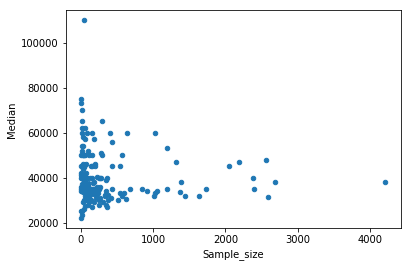

In [9]:
recent_grads.plot(x='Sample_size',y='Median',kind='scatter')

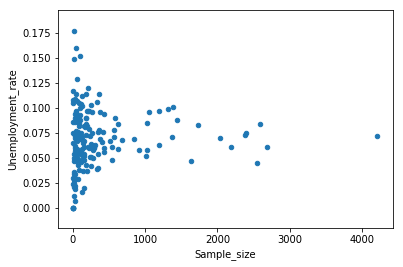

In [10]:
recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter')

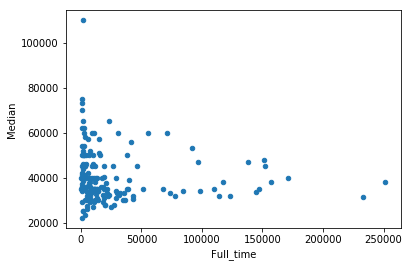

In [11]:
recent_grads.plot(x='Full_time',y='Median',kind='scatter')

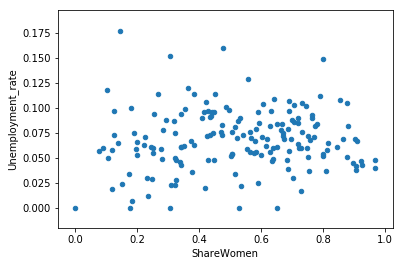

In [12]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter')

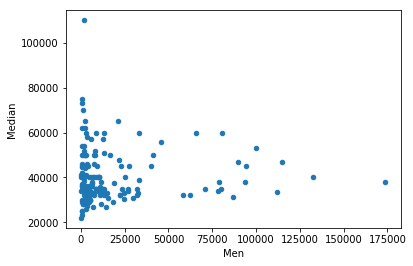

In [13]:
recent_grads.plot(x='Men',y='Median',kind='scatter')

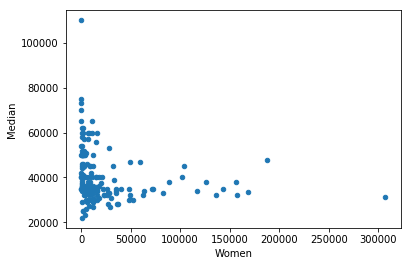

In [14]:
recent_grads.plot(x='Women',y='Median',kind='scatter')

# 3. Pandas, Histograms

To explore the distribution of values in a column, we can select it from the DataFrame, call Series.plot(), and set the kind parameter to hist:

`recent_grads['Sample_size'].plot(kind='hist')`

## TODO:
* Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
  * Sample_size
  * Median
  * Employed
  * Full_time
  * ShareWomen
  * Unemployment_rate
  * Men
  * Women
* We encourage you to experiment with different bin sizes and ranges when generating these histograms.
* Use the plots to explore the following questions:
  * What percent of majors are predominantly male? Predominantly female?
  * What's the most common median salary range?

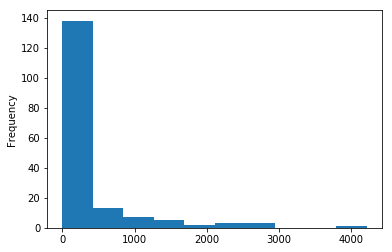

In [15]:
recent_grads['Sample_size'].plot(kind='hist')

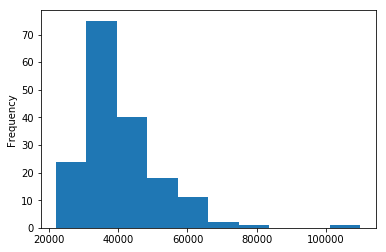

In [16]:
recent_grads['Median'].plot(kind='hist')

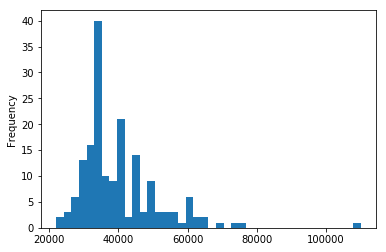

In [17]:
recent_grads['Median'].plot(kind='hist',bins=40)

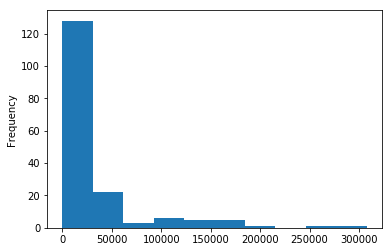

In [18]:
recent_grads['Employed'].plot(kind='hist')

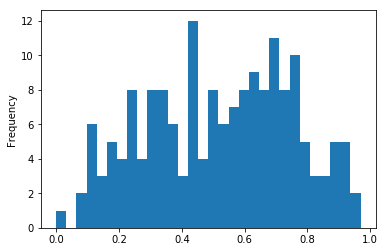

In [19]:
recent_grads['ShareWomen'].plot(kind='hist',bins=30)

# 4. Pandas, Scatter Matrix Plot

* In the last 2 steps, we created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. **A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously**

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named `scatter_matrix()` that generates the plots for us. This function is part of the pandas.plotting module and needs to be imported separately.

## TODO:
* Import scatter_matrix from the pandas.plotting module.
* Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
* Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.

In [20]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017828DE6080>,
      dtype=object)

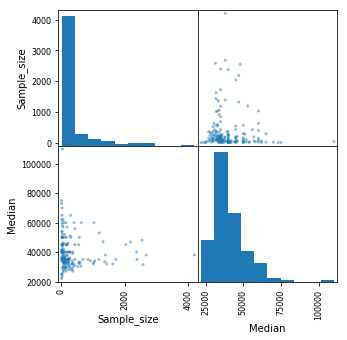

In [21]:
scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(5,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017829FDFDA0>,
      dtype=object)

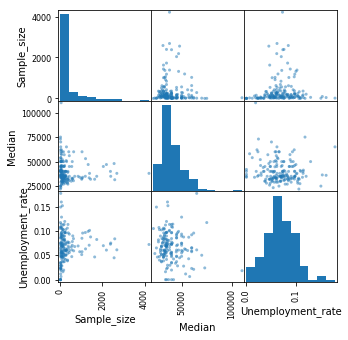

In [22]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(5,5))

# 5. Pandas, Bar Plots

* If we instead use the `DataFrame.plot.bar()` method, we can use the `x parameter to specify the labels` and the y parameter to specify the data for the bars

## TODO:

* Use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe.
* Use bar plots to compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.

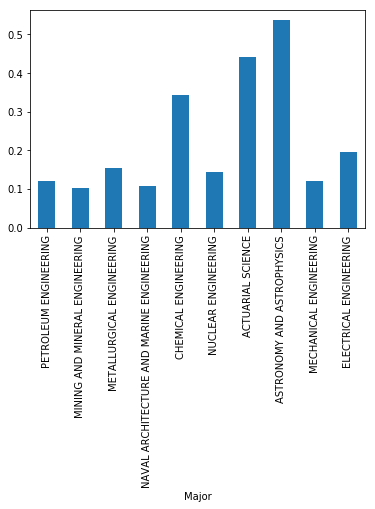

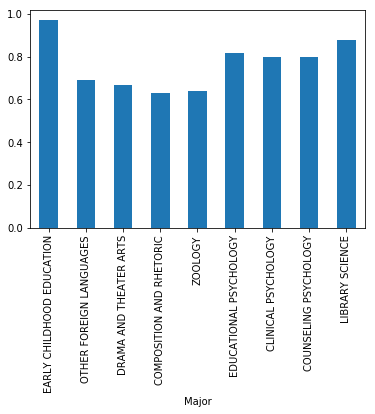

In [23]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)